In [1]:
import numpy as np                                
import matplotlib as mpl                         #for graphing purposes
import matplotlib.pyplot as plt                  #for making plots

from __future__ import print_function

#for interactive notebooks
%matplotlib notebook

In [2]:
#define class with name gaussian
class gaussian(object):
    #these are attributes of the class. They can be modified by using self.attribute = some-number
    #self is just the name of the instance belonging to this class
    #for example -----> a = gaussian('a') creates an instance labeled 'a' that belongs to the class named gaussian
    #you can look at cell just below to see how to create a class with this class type
    #below the initialization of the instances along with some ways to modify the attribute of the instances of our 
    #defined class type
    
    def __init__(self, name ='default', average = 0.0, sigma = 0.1, intensity = 1.0): 
        self.name = name
        self.average = average   #sets the average (the location of the gaussian distribution)
        self.sigma = sigma
        self.intensity = intensity
        self.x = np.linspace (average - 15,average + 15, 500) #creates the x axis array for plotting again
        self.f_dist = (self.intensity * 1.0 / (self.sigma * np.sqrt(2.0 * np.pi)) 
                          * np.exp(-(self.x - self.average)**2/(2.0*self.sigma**2)))
        self.max_value = self.intensity * 1.0 / (self.sigma * np.sqrt(2.0 * np.pi))
#max_value = self.gamma/(np.pi*(self.gamma**2)) # need to remember to turn this into a method to spit out the
#Full width half max and other useful parameters bassed on the attributes
    def f_gaussian(self):
        f_gaussian = (self.intensity * 1.0 / (self.sigma * np.sqrt(2.0 * np.pi)) 
                      * np.exp(-(self.x - self.average)**2/(2.0*self.sigma**2)))
        return self.f_gaussian
    
#this method ( a function within a class) is suppose to plot the distrubution and automatically give fwhm etc
#its not working cause I need to derive the FWHM equation with the intensity/scalar parameter
#i have the normalized equation in place
    def plot(self): 
        plt.figure() # standard figure stuff, just to provide a feel for fullwidth half max
        plt.subplot() 
        plt.plot(self.x, self.f_dist, label = 'Gaussian Distribution')
        plt.axvline ( x = self.average - self.sigma , ymin = 0.40, ymax = 0.60, color = 'r' )
        plt.axvline ( x = self.average + self.sigma , ymin = 0.40, ymax = 0.60, color = 'r' )
        plt.axhline ( y = self.max_value/2, xmin =0.4, xmax=0.6, color = 'g' )
        plt.xlabel('Some Variable')
        plt.ylabel('Some Dependent Variable')
        plt.title('Gaussian Distribution')
        plt.show()

#this method ( a function within a class) plots the attributes
    def add_plot(self):
        f_gaussian = (self.intensity * 1 / (self.sigma * np.sqrt(2 * np.pi)) 
                          * np.exp(-(self.x - self.average)**2/(2*self.sigma**2)))
        self.line_gaussian = ax_distribution.plot(self.x, self.f_dist, 
                                          label = self.name + ': $\sigma$ = ' + str(self.sigma) + 
                                          ', $\mu$ = ' + str(self.average) +
                                          ', Intensity = ' + str(self.intensity))

In [3]:
A = gaussian('A', average = -2, sigma = 2, intensity = 2)

B = gaussian('B', average = 4, sigma = 2, intensity = 1)

X = gaussian('X', average = -3, sigma = 2, intensity = 1)

Y = gaussian('Y', average = 5, sigma = 5, intensity = 1)

In [4]:
def f_convolution_discrete(dist_1, dist_2):
    dist_average = dist_1.average + dist_2.average
    f_convo_average = np.linspace( dist_average -5, dist_average + 5, 500)
    f_convo = np.convolve(dist_1.f_dist, dist_2.f_dist, mode ='same')  / sum(dist_2.f_dist)
    ax_distribution.plot(f_convo_average, f_convo, label = 'Convolution of '+ dist_1.name + ' and ' +dist_2.name)
    return f_convo

<IPython.core.display.Javascript object>


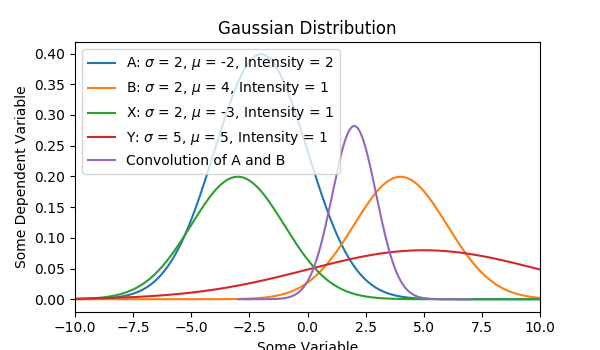

(-10, 10)

In [5]:
#goal is to figure out how to turn this cell into a function where gaussian.add_plot method can be added as 
#arguments want the amount to be abtrirary

plot_distribution_fig = plt.figure(figsize=(6,3.5))
ax_distribution = plot_distribution_fig.add_subplot(111)

A.add_plot()
B.add_plot()
X.add_plot()
Y.add_plot()
f_convolution_discrete(A, B)

ax_distribution.legend()
ax_distribution.set_xlabel('Some Variable')
ax_distribution.set_ylabel('Some Dependent Variable')
ax_distribution.set_title('Gaussian Distribution')
ax_distribution.set_xlim(-10,10)

In [6]:
plot_distribution_fig.savefig('Gaussian-Distribution-plots.svg', format='svg')

<IPython.core.display.Javascript object>


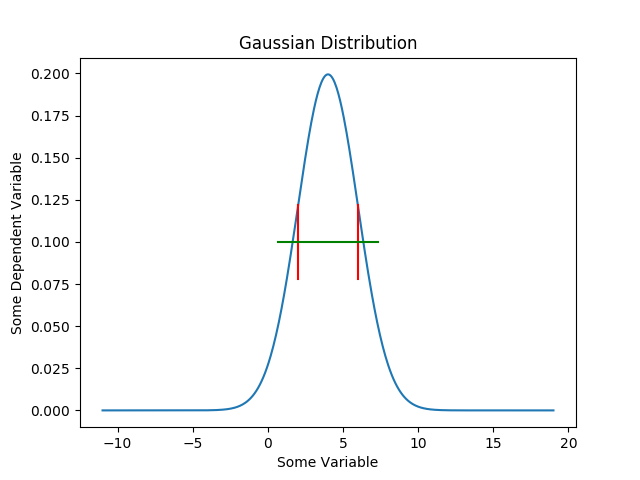

In [7]:
B.plot()

<IPython.core.display.Javascript object>


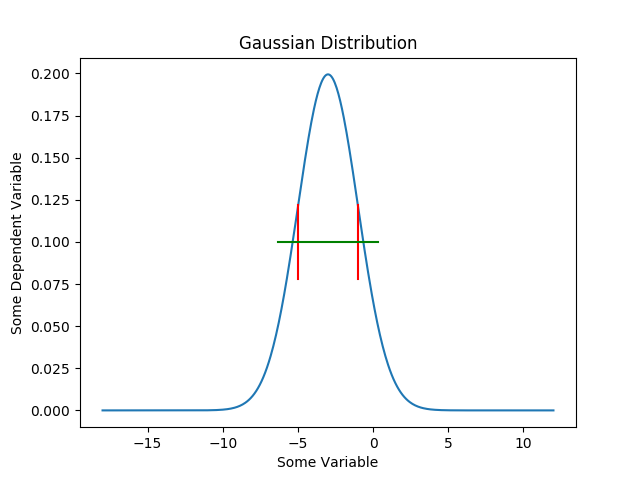

In [8]:
X.plot()